In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import scipy.io
import glob
import os

In [2]:
class slot_img(object):
    def __init__(self,img,mat):
         self.update(img,mat)
    def update(self,img,mat):
        self.img = img
        self.img_anot = np.copy(img)
        for m in mat['marks']:
            self.img_anot = cv2.circle(self.img_anot, tuple(map(round, m)), radius =10, color = (0,255,0), thickness = -1)
        self.slots = mat['marks']
        self.vacancy = []
        for s in mat['slots']:
            vacancy_num = s[2]
            vacancy = 'non-vacant'
            if (vacancy_num == 0):
                vacancy = 'vacant'
            elif (vacancy_num == 1):
                vacancy = 'non-vacant'
            elif (vacancy_num == 2):
                vacancy = 'parking'
            self.vacancy.append(vacancy)

In [20]:
slots = []
iterator = 0
num_samples = 200
training_dir = 'training/'
for file in glob.glob(training_dir + '*.jpg'):
    file_name = file[:-4]
    img = cv2.imread(file)
    mat = scipy.io.loadmat(file_name + '.mat')
    s = slot_img(img,mat)
    slots.append(s)
    iterator += 1
    if iterator >= num_samples:
        break

In [22]:
for s in slots:
   # plt.imshow(s.img_anot)
   # plt.show()
    print(len(s.slots),len(s.vacancy))

3 2
3 2
3 2
3 2
3 2
2 1
2 1
3 2
3 1
4 2
3 2
3 2
2 1
2 1
2 1
2 1
2 1
2 1
2 1
4 3
4 3
4 3
2 1
2 1
2 1
2 1
2 1
2 1
3 2
2 1
3 2
3 2
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
1 0
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
3 2
3 2
3 2
2 1
4 2
3 1
3 1
3 2
2 1
2 1
2 1
2 1
4 2
4 2
4 2
4 2
4 2
4 2
4 2
3 2
4 2
3 1
2 1
2 1
3 2
3 2
2 1
2 1
2 1
2 1
2 1
2 1
2 1
1 0
1 0
3 2
3 2
3 2
4 3
4 3
4 3
3 2
4 3
3 2
3 2
3 2
3 2
3 2
4 3
3 2
4 3
3 2
4 3
4 3
4 2
3 2
3 2
4 3
4 3
3 2
2 1
3 2
2 1
3 2
3 2
3 2
3 2
3 2
3 2
3 2
4 3
4 3
3 2
3 2
3 2
3 2
3 2
3 2
3 2
3 2
3 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
1 0
3 2
3 2
1 0
1 0
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
3 2
4 3
3 2
3 1
4 3
3 2
3 2
3 2
2 1
2 1
2 1
2 1
2 1
4 1
3 1
2 1
2 1
3 2
3 1
2 1
4 3


3 2
['vacant', 'vacant']


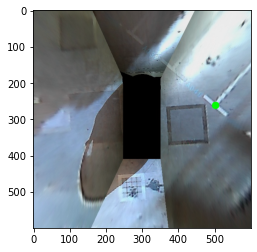

In [52]:
s = slots[30]
print(len(s.slots),len(s.vacancy))
print(s.vacancy)
img = s.img
img_1 = np.copy(img)
img_1 = cv2.circle(img_1, tuple(map(round, s.slots[2])), radius =10, color = (0,255,0), thickness = -1)
plt.imshow(img_1)